In [2]:
import cv2
import numpy as np

import os

import matplotlib.pyplot as plt


In [3]:
def plot_images(images, labels=None, row=None, col=None):
    
    '''
    Plot grid of images.
    
    Parameters:
    - images (list of numpy array): images to be plotted
    - labels (list of string, optional): labels for each image. Default is None
    - row (int, optional): number of rows in image grid.
    - col (int, optional): number of columns in image grid.
    '''
    
    # calculate the number of rows and columns in the grid
    l = len(images)
    if row is None or col is None:
        row = int(l ** (1/2))
        col = int(np.ceil(l / row))
    else:
        assert row * col >= l
    
    # plotting the images
    for i in range(l):
        plt.subplot(row, col, i+1)
        plt.xticks([])
        plt.yticks([])
        plt.imshow(cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB))
        if labels is not None:
            plt.title(labels[i])

In [4]:
def get_image_path(path):
    
    """
    Retrieves the paths of all JPEG images in the specified directory.

    Args:
        path (str): The path to the directory to search for JPEG images.

    Returns:
        list: A list of full paths to the JPEG images in the specified directory.
    """
    
    paths = os.listdir(path)
    
    image_path = []
    
    for p in paths:
        if p.endswith(".jpg"):
            image_path.append(os.path.join(path, p))
    
    return image_path
    

In [5]:
def load_image(path):
    
    """
    Loads an image from the specified path using OpenCV.

    Args:
        path (str): The path to the image file.

    Returns:
        image: The loaded image as a NumPy array if the file exists, otherwise None.
    """

    
    if os.path.exists(path):
        image = cv2.imread(path)
        
        return image
    

In [6]:
def draw_bounding_box(image, faces):
    
    """
    Draws bounding boxes around detected faces on the image.

    Args:
        image (numpy.ndarray): The input image on which to draw bounding boxes.
        faces (list of tuples): A list of tuples, each representing a detected face. 
                                Each tuple contains (x, y, w, h) where
                                (x, y) is the top-left corner of the bounding box,
                                w is the width, and h is the height.

    Returns:
        numpy.ndarray: A copy of the input image with bounding boxes drawn around the faces.
    """

    
    image_copy = image.copy()
    
    for face in faces:
        
        print(face)
        
        (x, y, w, h) = face
        cv2.rectangle(image_copy, (x, y), (x + w, y + h), (0,255,0), 1)
    
    return image_copy

In [7]:
def detect_face(detector, image):
    
    """
    Detects faces in an image using a given face detector.

    Args:
        detector (cv2.CascadeClassifier): The OpenCV face detector.
        image (numpy.ndarray): The input image in which to detect faces.

    Returns:
        list of tuples: A list of tuples, each representing a detected face. 
                        Each tuple contains (x, y, w, h) where
                        (x, y) is the top-left corner of the bounding box,
                        w is the width, and h is the height.
    """
    
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    faces = detector.detectMultiScale(gray_image, 1.3, 5)
    
    return faces
    

In [8]:
# get the image paths
image_path = get_image_path("./images/")

# load face detector
face_detector = cv2.CascadeClassifier("./haarcascade_frontalface_default.xml")

In [9]:
# data_dir = "./data/train/images"
# target_dir = "./data/train/target"

images_dir = "./data/images"
labels_dir = "./data/labels"

i = 0


for img_path in image_path[:5000]:
    
    # Load the image and detect faces in the image
    image = load_image(img_path)
    faces = detect_face(face_detector, image)
    
    
    # Check if images_dir exists, if not, create the directory structure
    if not os.path.exists(images_dir):
        os.mkdir(images_dir)
        os.mkdir(os.path.join(images_dir, "train"))
        os.mkdir(os.path.join(images_dir, "test"))
        
    # Check if labels_dir exists, if not, create the directory structure
    if not os.path.exists(labels_dir):
        os.mkdir(labels_dir)
        os.mkdir(os.path.join(labels_dir, "train"))
        os.mkdir(os.path.join(labels_dir, "test"))
    
    # check if face is found or not
    if len(faces) > 0:
        img_h, img_w, _ = image.shape
        
        e = np.random.rand() >= 0.2
        
        x, y, w, h = faces[0]
        
        x /= img_w
        y /= img_h
        
        w /= img_w
        h /= img_h
        
        # Save the image to train or test directory
        if e:        
            cv2.imwrite(os.path.join(images_dir, f"train/{i}.jpg"), image)
            
            with open(os.path.join(labels_dir, f"train/{i}.txt"), "w") as file:
                file.write(f"{0} {x+w/2} {y+h/2} {w} {h}")
                file.close()
        else:
            cv2.imwrite(os.path.join(images_dir, f"test/{i}.jpg"), image)
            
            with open(os.path.join(labels_dir, f"test/{i}.txt"), "w") as file:
                file.write(f"{0} {x+w/2} {y+h/2} {w} {h}")
                file.close()
            
        
        i += 1

In [37]:
def load_train_data(idx):
    
    """
    Loads an image and its corresponding label from the training dataset.

    Args:
        idx (int): The index of the image and label to load.

    Returns:
        tuple: A tuple containing the loaded image and its label values.
    """
    
    image = cv2.imread(f"./data/images/train/{idx}.jpg")
    
    filename = f"./data/labels/train/{idx}.txt"
    
    with open(filename, "r") as file:
        line = file.readline()
        values = [float(x) for x in line.strip().split()]
        
    return image, values

img, (_, x, y, h, w) = load_train_data(313)
    

In [38]:
img_h, img_w, _ = img.shape
img_w, img_h

(306, 306)

In [39]:
img_box = draw_bounding_box(img, ([[np.uint((x-w/2) * img_w), np.uint((y-h/2) * img_h), np.uint(w * img_w), np.uint(h *img_h)]]))

[47, 47, 171, 171]


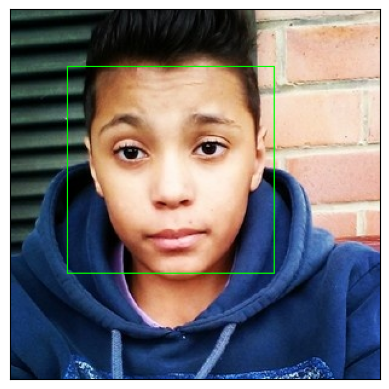

In [40]:
plot_images([img_box])